In [104]:
#About this file:
#Generates fake height CME data to test the velocity functions
#After creating this fake height data, we then add noise to it to see whether or not the noise creates
#a sinusoidal curve
#The fake height data is created in a value called 'h' defined in the block below
#The fake height data with noise is created in 'noise_h'
#The velocity function we are testing is created in 'v'
#The velocity that we get from the derivative of 'h' should match 'v'

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

In [105]:
#based off Dec 19, 1996 data
delta_time = 50.0 * 60.0 # 15 minutes apart for recordings, times 60 to get seconds
h_0 = 2.76 * 6.95700e8 #height is 2.76 solar radius, in m. Grabbed from 1996
v_0 = 100  *1000 #velocity is 100 m/s
a_0 = 2 # m/s^2

time = np.arange(0.0, 1400.0*60, delta_time)
h = h_0 + (v_0 * time) + (0.5 * (time**2) * a_0) #fake height data
v = v_0 + (time * a_0) #velocity function (in m/s)
noise_h = h + (h * np.random.normal(scale=0.05, size=len(h))) #data with noise

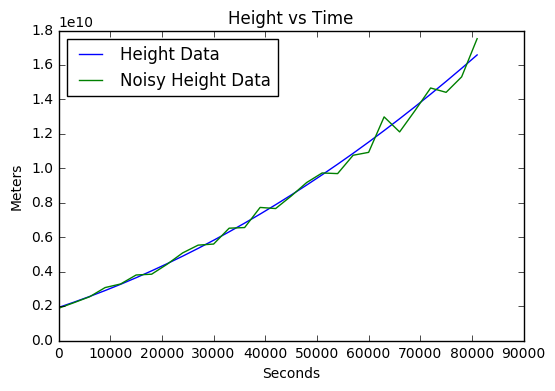

In [106]:
plt.title("Height vs Time")
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.plot(time, h, label='Height Data')
plt.plot(time, noise_h, label='Noisy Height Data')
plt.legend(loc=2)

v=179537.241122 m/s, h=1.291324 R_Sun
a=2.104310 m/s, v=94.312685 km/s, h=2.883849 R_Sun


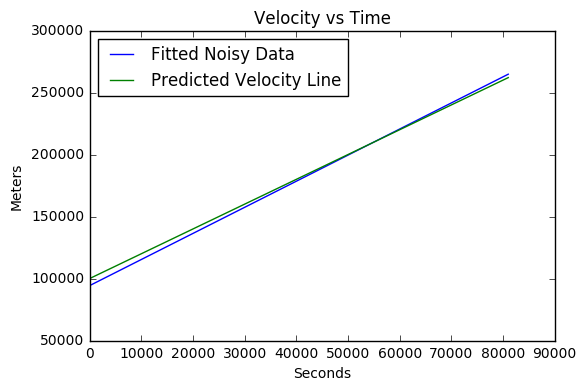

In [107]:
#1 solar radius=6.95700e8
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A, noise_h)[0]
A = np.vstack([time**2, time, np.ones(len(time))]).T
quad = np.linalg.lstsq(A, noise_h)[0]

print('v=%f m/s, h=%f R_Sun' % (lin[0], lin[1]/6.95700e8))
print('a=%f m/s, v=%f km/s, h=%f R_Sun' % (quad[0]*2, quad[1]/1000, quad[2]/6.95700e8))

fit_noisy_v = quad[1] + (time * quad[0]*2)
plt.title("Velocity vs Time")
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.plot(time, fit_noisy_v, label='Fitted Noisy Data')
plt.plot(time, v, label='Predicted Velocity Line')
plt.legend(loc=2)

In [108]:
diff_noisy_h=np.diff(noise_h/1000)
diff_time_data=np.diff(time)

noisy_v=diff_noisy_h/((diff_time_data.astype(float)))

A = np.vstack([time, np.ones(len(time))]).T
print ("this is A: ", A)
print ("this is noisy_v: ", noisy_v)
#lin = np.linalg.lstsq(A, noisy_v)[0]

print('v=%f m/s, h=%f R_Sun' % (lin[0], lin[1]/6.95700e8))

fit_noisy_a = lin[1] + (time * lin[0]*2)
plt.title("Acceleration vs Time")
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.plot(time, fit_noisy_a, label='Fitted Noisy Data')
#plt.plot(time, v, label='Predicted Velocity Line')
plt.legend(loc=2)

this is A:  [[  0.00000000e+00   1.00000000e+00]
 [  3.00000000e+03   1.00000000e+00]
 [  6.00000000e+03   1.00000000e+00]
 [  9.00000000e+03   1.00000000e+00]
 [  1.20000000e+04   1.00000000e+00]
 [  1.50000000e+04   1.00000000e+00]
 [  1.80000000e+04   1.00000000e+00]
 [  2.10000000e+04   1.00000000e+00]
 [  2.40000000e+04   1.00000000e+00]
 [  2.70000000e+04   1.00000000e+00]
 [  3.00000000e+04   1.00000000e+00]
 [  3.30000000e+04   1.00000000e+00]
 [  3.60000000e+04   1.00000000e+00]
 [  3.90000000e+04   1.00000000e+00]
 [  4.20000000e+04   1.00000000e+00]
 [  4.50000000e+04   1.00000000e+00]
 [  4.80000000e+04   1.00000000e+00]
 [  5.10000000e+04   1.00000000e+00]
 [  5.40000000e+04   1.00000000e+00]
 [  5.70000000e+04   1.00000000e+00]
 [  6.00000000e+04   1.00000000e+00]
 [  6.30000000e+04   1.00000000e+00]
 [  6.60000000e+04   1.00000000e+00]
 [  6.90000000e+04   1.00000000e+00]
 [  7.20000000e+04   1.00000000e+00]
 [  7.50000000e+04   1.00000000e+00]
 [  7.80000000e+04   1.000

LinAlgError: Incompatible dimensions

In [ ]:
#Plot Velocity vs Time
diff_height_data=np.diff(h)
diff_time_data=np.diff(time)
velocity=diff_height_data/(diff_time_data.astype(float))
#for the noisy data
diff_noise_h_data=np.diff(noise_h)
noise_v=diff_noise_h_data/(diff_time_data.astype(float))

plt.title("Velocity vs Time")
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')
plt.plot(time/60, v/1000)
plt.plot(time[:-1]/60, velocity/1000)
plt.plot(time[:-1]/60, noise_v/1000, '.')
plt.show()